# Linear Classification 
* Lets take a minute to talk about linear classification in its simplest form: a 2 dimensional plane 

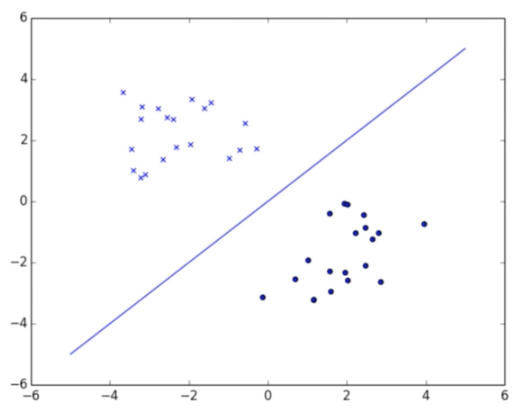

* Here we have a bunch of 'x's and a bunch of 'o's, and we can see that they can be separated by a line. 
* That line can be described simply by:
$$y = mx + b$$
or 
$$0 = ax + by + c$$
where in this case
$$a =1,\; b=-1, \; c=0$$
or, in other words the equation for our separating line in this case is:
$$0 = x - y $$
* Now lets say we have a test point at (2,1)

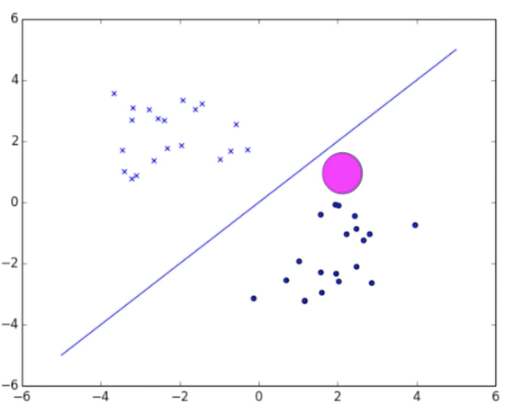

* Should it be classified as an 'x' or an 'o'?
Well, lets look at the equation of our line:
$$h(x,y) = x - y$$
$$h(2,1) = 1 $$
* Because 1 is greater than 0, it will be classified as an 'o'
* Now lets say we have another point: (1,2) 

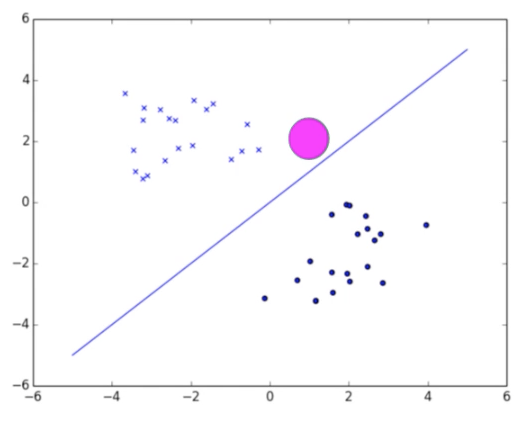

* Should it be classified as an 'x' or an 'o'?
Again, lets look at the equation of our line:
$$h(x,y) = x - y$$
$$h(2,1) = -1 $$
* Because -1 is less than 0, it will be classified as an 'x'

Now, lets say we have a third new point, at (1,1):

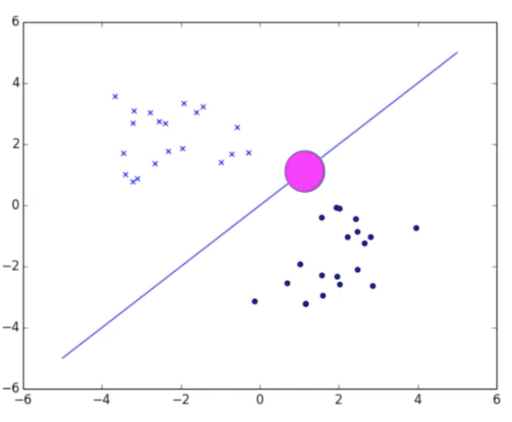

* This falls directly on our line, so we can't really tell whether it should be an 'x' or an 'o'

## Machine Learning Lingo
* This is the essence of linear classification 
* Our job is: we are given all of the 'x's and the 'o's, and we need to find the a, b, and c which define the line
* We generally call:
> 
* (x1,x2,x3) = **x**, which is a vector
* We rename a,b,c to **$w_i$**
* We call bias term/intercept **$w_o$**, and usually create a dummy variable **$x_0$**, which is always equal to 1
* And then we can form our hypothesis function:
$$h(x) = w_0 + w_1x_1+w_2x_2$$
* we can say that h is a **linear combination** of the components of **x**
* in vector form we can write: 
$$h(x) = w^Tx$$
* In 3 dimensions: the line that we categorized with becomes a plane
* In greater than 3 dimensions: our line becomes a hyperplane

---
# Biological Inspiration - The Neuron 
* We are now going to talk about the history of neural networks, and the architecture of the neuron, which is the inspiration for logistic regression 
* Here is what we can take away from what we know about the neuron:

>* many inputs, one output
* Spike or no spike: 0/1 output
* Synapse strengths: linear weights 

One may ask, if we put a bunch of these neurons together, could we build an intelligent thinking brain inside of a computer- i.e. could we build a conciousness?

---
# How do we calculate the output of a neuron/logistic classifier?
* How do you get a prediction using logistic regression?

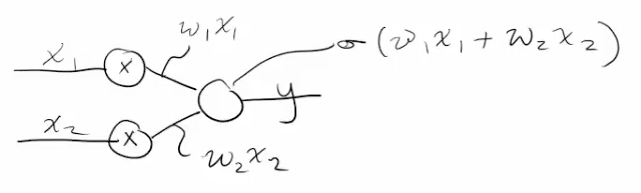

* we can see here this is a 2 dimensional input (x1, x2)
* We have the output y
* We know that we have to multiply each input x by a weight, so we can think of the second wires as:
$$w_1x_1, \; and \; w_2x_2$$
* So the first two circles are multipliers
* The cirlce on the right is a sum-mer and nonlinear transform! 
* in other words it is some function of the sum of its inputs
$$f(w_1x_1+w_2x_2)$$

## Unique thing about logistic regression
* The very unique thing about logistic regression, is the circle that comes before the output y
* It applies what is known as the logistic function, or the sigmoid function 
* Recall the sigmoid function below:

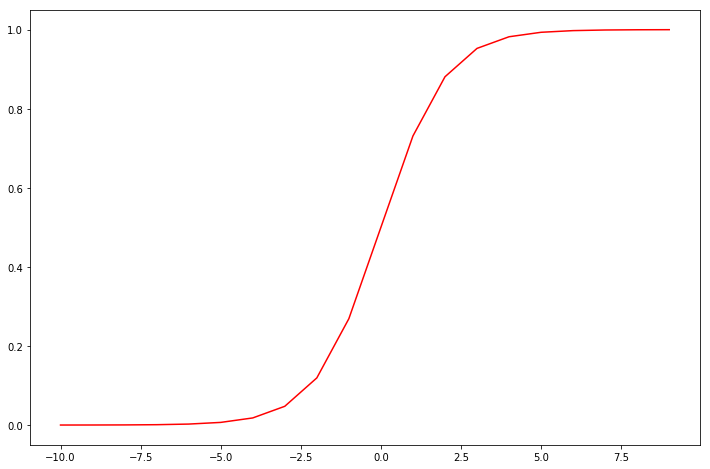

In [280]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

We define the sigmoid as:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$
We can combine the sigmoid and out input wires to say that the output of logistic regression is:
$$\sigma(w^Tx) = \sigma(w_1x_1+w_2x_2+...+w_nx_n)$$
* This tells us that if the inner product of w and x is very positive, we will get a number very close to 1
* And if it is very negative, we get a number very close to 0
* if we output 0.5, then the probability of belonging to either of the classes is 50%

## What is the difference between logistic regression and linear classifier
* we have the logistic function at the end that forces out output to be between 0 and 1 
* So now, when we do our classification, we can say anything above 0.5 will give us class 1, and anything else will give us class 0 

---
# How do you calculate the output of a neuron/logistic classifier? 
Lets write some code to perform logistic regression! 

### Start by importing numpy

In [281]:
import numpy as np

### Create some data to do logistic regression on 

In [282]:
# number of examples
N = 100
# number of dimensions
D = 2

# creating N x D normally distributed data matrix
X = np.random.randn(N,D)

### Bias term
Lets add a column of ones to the original data and include the bias term.

In [283]:
# creating a ones matrix that is N x 1 (N rows and 1 column)
ones = np.array([[1]*N]).T

### Concatenate ones matrix to original data set 

In [284]:
Xb = np.concatenate((ones, X), axis=1)

### Randomly initialize a weight vector

In [285]:
# must be of length D + 1 to account for bias term 
w = np.random.randn(D + 1)

### Calculate dot product between each row of X and w 
* could do in a for loop
* But it is much more efficient to use numpy's built in matrix multiplication
* In numpy, `*` means element wise multiplication
* In order to do matrix multiplcation, must use function `dot`

In [286]:
z = Xb.dot(w)

### Apply the sigmoid

In [287]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [288]:
sigmoid(z)

array([ 0.2781432 ,  0.63927274,  0.50159938,  0.31742998,  0.16908502,
        0.15435286,  0.57790882,  0.15693212,  0.48422915,  0.03266343,
        0.39949203,  0.273597  ,  0.42433648,  0.5654525 ,  0.39418506,
        0.15302288,  0.32201554,  0.27488779,  0.53375007,  0.06134543,
        0.60309585,  0.09460912,  0.50939644,  0.16213875,  0.2862845 ,
        0.50362332,  0.30653186,  0.63810374,  0.88468908,  0.07701428,
        0.61066007,  0.50464919,  0.02313685,  0.83553685,  0.11783111,
        0.09873511,  0.1132067 ,  0.31437409,  0.29297561,  0.40421974,
        0.63898953,  0.76546532,  0.52671895,  0.05834408,  0.23775517,
        0.16072126,  0.17496006,  0.04845698,  0.61283889,  0.66916812,
        0.41180617,  0.06325744,  0.52583555,  0.53500774,  0.02331364,
        0.33234472,  0.43864231,  0.07480102,  0.79633602,  0.36987464,
        0.22218814,  0.5463026 ,  0.09325897,  0.2737493 ,  0.78922195,
        0.53644396,  0.04648359,  0.05056803,  0.27678563,  0.69

### Result
* We can see that the output is (N x 1) and our values are between 0 and 1 as expected 

---
# E-commerce project - Data Preprocessing
* Lets continue with the ecommerce project, specifically looking at how we are going to process the data

### Starting with our imports 

In [289]:
import numpy as np
import pandas as pd

### Load the data and get a quick look at it

In [290]:
df = pd.read_csv('data/ecommerce_data.csv')
df.head()

is_mobile  n_products_viewed  visit_duration  is_returning_visitor  \
0          1                  0        0.657510                     0   
1          1                  1        0.568571                     0   
2          1                  0        0.042246                     1   
3          1                  1        1.659793                     1   
4          0                  1        2.014745                     1   

   time_of_day  user_action  
0            3            0  
1            2            1  
2            1            0  
3            1            2  
4            1            2

### Load the Data Function
* This function will grab the csv as usual
* then turn it into a numpy matrix so it is easier to work with
* split out X and y 
* normalize numerical columns
* one hot encode categorical column 

In [291]:
def get_data():
    df = pd.read_csv('data/ecommerce_data.csv')
    data = df.as_matrix()
    
    # grabbing all rows, and all columns except the last one
    X = data[:, :-1]
    # grabbing all rows, and the last column
    Y = data[:, -1]
    
    # normalize
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()  
    
    # get shape of X
    N, D = X.shape
    
    # create a new X, with additional columns for each time of day bucket
    X2 = np.zeros((N, D + 3))
    
    # grab all old columns (except time_of_day) from X and add to X2
    X2[:, 0:(D-1)] = X[:, 0:(D-1)]
    
    # one hot encoding for other 4 columns (for the time_of_day)
    # loop through every sample, get time of day (either 0, 1, 2, or 3)
    # set that value in X2 equal to 1
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t + D - 1] = 1
        
    return X2, Y

### Write function to get Binary data from logistic class
* remember we don't want the full data set here, just the 0 or 1 user actions
* this will call get_data() and then filter it, only taking classes 0 and 1 

In [292]:
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

---
# E-commerce project - Making Predictions

### First lets get the data

In [293]:
X, Y = get_binary_data()

### Get the dimensionality of the dataset

In [294]:
D = X.shape[1]

### Use that to initialize the weights of our logistic regression model
* b is a bias term and a scalar

In [295]:
W = np.random.randn(D)
b = 0 

### Create functions to make our predictions

In [296]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

P_of_Y_given_X = forward(X, W, b) 

predictions = np.round(P_of_Y_given_X)

### Create a function to determine classification rate

In [297]:
def classification_rate(Y, P):
    return np.mean(Y == P)

### And finally lets print the score

In [298]:
print("Score: ", classification_rate(Y, predictions) )

Score:  0.273869346734


In [299]:
print(W)

[-0.41404162 -2.74264674 -2.42967651 -1.02837179 -0.19372962  0.40178565
 -0.43196773  1.27766136]


## Takeaway
* We can see from the above print out that our accuracy was not very good when we chose the weights randomly! 
* However, we are going to talk next about how we could train our classifier to select weights that allow us to make better predictions

---
# Structure of Logistic Regression Model
* As we have seen, in order to get an output from logistic regression (which is a probability!), we do the dot product between our weights and the input features X, and pass that through the sigmoid function. 
* Our model looks like:
$$y = probability \; of \; certain\;class= \sigma(w^Tx)$$
* A question though, is what kind of model do we get if we don't use the sigmoid?
$$y = w^Tx$$ 
* The answer we get the linear regression model!!!
* However, it is important to note that this form of model is not the only thin that makes linear regression, linear regression! 
* We are going to see that we have a specfic objective function that we use for logistic regression, that is very different than the one that we use for linear regression (Least Squares)
* also, we will see that we have a very different interpretation of the output and the weights of logistic regression
* So the only thing that makes this like linear regression, is its functional form: it is a linear combination of the input features, weighted by the weights

---
# Prediction Section Summary 
* In this section, we saw what the logistic regression model "looks like":
$$y = probability \; of \; certain\;class= \sigma(w^Tx)$$
* For context, we can have other kinds of "models", like decision trees or k-nearest neighbors
* However, logistic regression generally makes the explicit assumption that your data can be separated by a line/plane
* That is what we mean by "modeling": we make assumptions about mathematical form, and all later work follows from these assumptions 

## Input -> Output
* This section was all about answering the question, how does this model work?
* How does it make predictions?
* How do we get from the input to the output? 
* The important question that we still need to answer: We have these weights, how do we find the optimal values of them??
* That will be discussed in section 3, using a solid foundation in probability!